In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import pymongo
import datetime
from statistics import mean
import collections

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from time import time
import scipy.stats
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



# set seed for reproducibility
np.random.seed(0)

!pip install -U jupyter
!pip3 install numpy==1.16.4
!pip install --upgrade pip
!pip3 install -U seaborn==0.9.0
!pip install pandasql
!pip install pymongo


from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Pandas, and NumPy: 

from time import time


# Import the required libraries

import pymongo
import datetime
import collections




  Using cached numpy-1.16.4.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.
  C:\Users\ajarir\AppData\Local\Temp\pip-install-iqq_m5oy\numpy_415fac2e69fc4eccbc9304a21d1f22d2\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No module

  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy-1.20.3.dist-info\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy-1.20.3.dist-info
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy
  Moving to c:\users\ajarir\anaconda3\scripts\f2py-script.py
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-lnss4q9c\f2py-script.py
  Moving to c:\users\ajarir\anaconda3\scripts\f2py.exe
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-lnss4q9c\f2py.exe
  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\ajarir\anaconda3\python.exe -m pip install --upgrade pip


# Reading the data

In [2]:

# read in all our data
traineddata = pd.read_csv("data/train.csv")
test = pd.read_csv('data/test.csv')


# 8) Missing Value Treatment

In [3]:
traineddata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Finding the nul vales

In [4]:
traineddata.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Finding the total count of missing values

In [5]:
total_missing = traineddata.isnull().sum().sum()
print(total_missing)


3873


# Finding the percentage of missing values
first we have to find the shape of the dataset

In [6]:
shape = traineddata.shape
print(shape)


(8523, 12)


# How many total missing data is there

This code is calculating the total number of cells in the Pandas DataFrame nfl_data.

The first line of code gets the shape of the DataFrame as a tuple of (number of rows, number of columns). Then, the function np.product is called on this tuple, which calculates the product of all the elements in the tuple. This will give the total number of cells in the DataFrame, which is equal to the number of rows multiplied by the number of columns.

The second line of code then prints this total number of cells.

For example, if the DataFrame traineddata has 8523 rows and 12 columns, the total number of cells would be 8523 * 12 = 102276.

In [7]:

total_cells = np.product(traineddata.shape)

print(total_cells)


102276


## how many total missing values do we have?

#  percent of data that is missing

Show the percentage of missing data using this fourmla:

(total_missing_values)/(total_cells)* 100

In [8]:
percent_missing = (total_missing/total_cells) * 100

print("Percentage of missing values: {}%".format(percent_missing))

Percentage of missing values: 3.786812155344362%


### Since the missing values are less than 5%, we can fill the missing values with the avrage, regarding the numerical values, and the categorical values, after label encoding

In [9]:
#Read the data into a DataFrame
modified_data = traineddata.copy()

#Calculate the average value for each column
item_weight_mean = modified_data['Item_Weight'].mean()
#outlet_size_mean = modified_data['Outlet_Size'].mean()

#Fill the missing values with the average value
modified_data['Item_Weight'].fillna(item_weight_mean, inplace=True)
#modified_data['Outlet_Size'].fillna(outlet_size_mean, inplace=True)



#Print the data to check the missing values have been filled
modified_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 9) Feature Engineering

In this section, we will modify number of columns, or feature. Also called Feature engineering.

# Cleaning inconsistancy

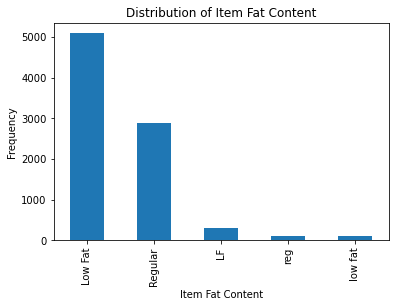

In [10]:
modified_data['Item_Fat_Content'].value_counts().plot(kind='bar')
plt.xlabel('Item Fat Content')
plt.ylabel('Frequency')
plt.title('Distribution of Item Fat Content')
plt.show()


### We can clearly see that there are inconsitancy in data, such as LF, and low fat. Also reg, and Regular, there for this feature needs to be modified

# Modifing the fat_content feature: Low Fat

<AxesSubplot:>

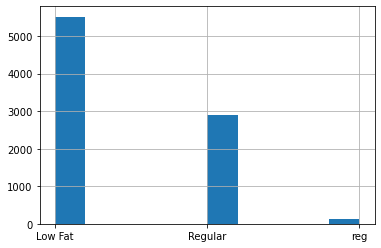

In [11]:
# Replace 'LF' and 'low fat' with 'Low Fat'
modified_data["Item_Fat_Content"].replace(to_replace =["LF", "low fat"], value = "Low Fat", inplace=True)

modified_data["Item_Fat_Content"].hist()


# Modifing the fat_content feature: Regular

<AxesSubplot:>

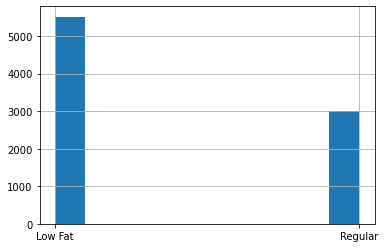

In [12]:
# Create a dictionary to map the inconsistent values to a consistent value
fat_content_map = {"Regular": "Regular", "reg": "Regular"}

# Use the replace() method to replace the values in the "Item_Fat_Content" column
modified_data["Item_Fat_Content"].replace(fat_content_map, inplace=True)
# Plot a histogram of the values
modified_data["Item_Fat_Content"].hist()


### The frequancy of the fat content

In [13]:
modified_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Modify the item_type feature to a broad subgroup

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

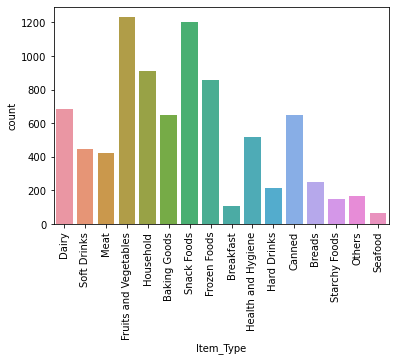

In [14]:
sns.countplot(modified_data.Item_Type)
plt.xticks(rotation=90)

### Since we have 16 types of items, we will make a more broad subgroup for them to be as follows: Food, Drinks, non-consumable

In [15]:
# Create a dictionary with the mapping of the values
mapping = {'Dairy': 'Food', 'Soft Drinks': 'Drink', 'Meat': 'Food', 'Household': 'Non-consumable',
           'Baking Goods': 'Food', 'Snack Foods': 'Food', 'Fruits and Vegetables': 'Food',
           'Breakfast': 'Food', 'Health and Hygiene':'Food', 'Frozen Foods' : 'Food','Hard Drinks': 'Food', 'Canned': 'Food', 'Starchy Foods': 'Food', 'Breads': 'Food', 'Others': 'Non-consumable', 'Seafood': 'Food'}

# Replace the values in the 'Item_Type' column with the new categories
modified_data['Item_Type'] = modified_data['Item_Type'].replace(mapping)

print(traineddata['Item_Type'].unique())




['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


# Plot the result

(array([0, 1, 2]),
 [Text(0, 0, 'Food'), Text(1, 0, 'Drink'), Text(2, 0, 'Non-consumable')])

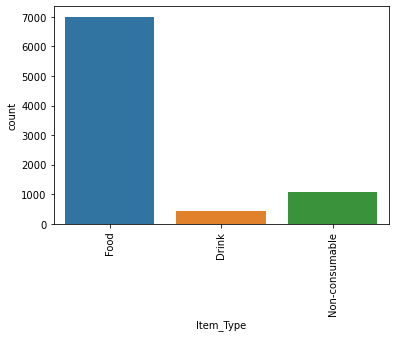

In [16]:
sns.countplot(modified_data.Item_Type)
plt.xticks(rotation=90)


### Now back to our fat_type column. Since we have items that are non-consuable, thus we have to create a new value that is spesifed for this case, and we will name it '"Non-Edible"



In [17]:
#Get the first two characters of ID:
modified_data['Item_Type'] = modified_data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
modified_data['Item_Type'] = modified_data['Item_Type'].map({'FD':'Food',                                                      'NC':'Non-Consumable',                                                            'DR':'Drinks'})
modified_data['Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type, dtype: int64

In [18]:
#Mark non-consumables as separate category in low_fat:
modified_data.loc[modified_data['Item_Type']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
modified_data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

# Plot the categories of the Item_Fat_Content to check

<AxesSubplot:>

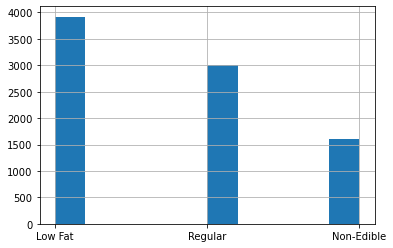

In [19]:
modified_data["Item_Fat_Content"].hist()

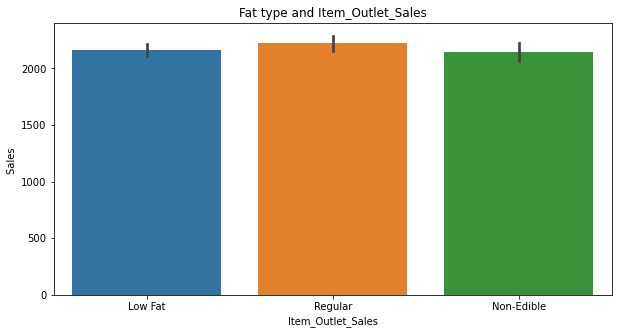

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=modified_data)
plt.title('Fat type and Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Sales ')
plt.show()

In [21]:
modified_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Food,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Non-Edible,0.000000,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
modified_data.shape

(8523, 12)

# Data normlization

We have seen in the data exploration Notebook, that Item_Visibility and Item_Outlet_Sales are not normalized. <br>
Since sales is our target value that needs to be normlized for the ml model, we will normlize the Item_Outlet_Sales. <br>
While the Item_Visibility, we will impute it with mean visibility of that product.

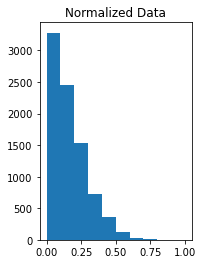

In [23]:

# Create MinMaxScaler object
scaler = MinMaxScaler()

# Scale the 'Item_Outlet_Sales' column
scaled_sales = scaler.fit_transform(modified_data[['Item_Outlet_Sales']])

# Save the scaled values to the original dataset
modified_data['Item_Outlet_Sales'] = scaled_sales


plt.subplot(1, 2, 1)
plt.hist(modified_data['Item_Outlet_Sales'])
plt.title('Normalized Data')



plt.show()

In [24]:
modified_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.283587
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.031419
2,FDN15,17.50,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.158115
3,FDX07,19.20,Regular,0.000000,Food,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,0.053555
4,NCD19,8.93,Non-Edible,0.000000,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0.073651


# Item_Visibility	

In [25]:
# Group the data by 'Item_Identifier' and calculate the mean visibility for each product
mean_visibility = modified_data.groupby('Item_Identifier')['Item_Visibility'].mean()

# Define a function to replace zero values with the mean visibility for that product
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return mean_visibility[item]
    else:
        return visibility

# Replace zero values in the 'Item_Visibility' column with the mean visibility for that product
modified_data['Item_Visibility'] = modified_data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean, axis=1)


In [26]:
modified_data['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.015274
4       0.008082
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

# Checking the normality

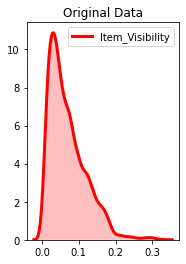

In [27]:


# Assign the column to a variable
col = modified_data['Item_Visibility']


# plot original data as a kernel density estimate
plt.subplot(1, 2, 1)
sns.kdeplot(col, color='r', linewidth=3, shade=True)
plt.title('Original Data')


plt.show()


# Data encoding

We will perform label encoding for the categorical data; which are: <br>
1. Item_Fat_Content 
2. Item_Type Outlet_Size 
3. Outlet_Location_Type	
4. Outlet_Type


We will first have to inislize an encoder, then we will plot the values, then sort them, then encode them 

### Initlizing the encoder  

In [28]:
encoder = preprocessing.LabelEncoder()


### Outlet_Size

(array([0, 1, 2]),
 [Text(0, 0, 'High'), Text(1, 0, 'Medium'), Text(2, 0, 'Small')])

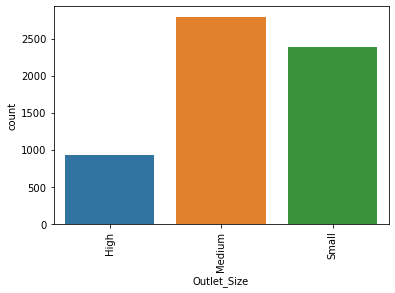

In [37]:
sortedSize = modified_data.sort_values(by='Outlet_Size', ascending=True)
sns.countplot(sortedSize['Outlet_Size'])
plt.xticks(rotation=90)


In [44]:
modified_data['Outlet_Size'] = encoder.fit_transform(modified_data['Outlet_Size'] )


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

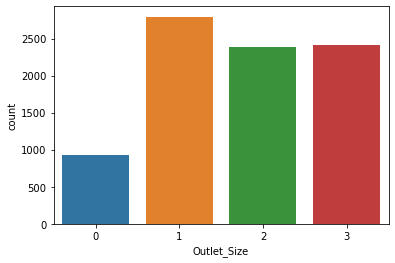

In [45]:
sns.countplot(modified_data['Outlet_Size'])


# Now after encoding, we can replace the empty values with the mean  

In [46]:
outlet_size_mean = modified_data['Outlet_Size'].mean()
modified_data['Outlet_Size'].fillna(outlet_size_mean, inplace=True)

In [83]:
print(modified_data['Outlet_Size'].mean())

1.736360436466033


In [84]:
modified_data['Outlet_Size'].replace(3, 1, inplace=True)


In [47]:
modified_data['Outlet_Size'].value_counts()

1    2793
3    2410
2    2388
0     932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

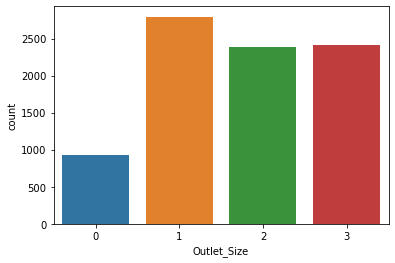

In [49]:
sns.countplot(modified_data.Outlet_Size)


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

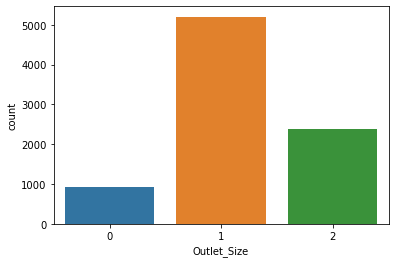

In [85]:
sns.countplot(modified_data.Outlet_Size)

# Encode the outlet type

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Grocery Store'),
  Text(1, 0, 'Supermarket Type1'),
  Text(2, 0, 'Supermarket Type2'),
  Text(3, 0, 'Supermarket Type3')])

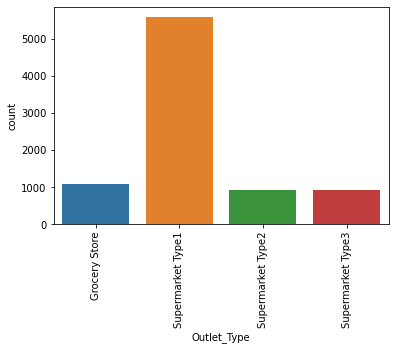

In [50]:
sorted_data = modified_data.sort_values(by='Outlet_Type')
sns.countplot(sorted_data['Outlet_Type'])
plt.xticks(rotation=90)


# Encode the sorted data

### Outlet_Type

In [79]:
encoder.fit(modified_data['Outlet_Type'])

# Transform the 'Outlet_Type' column
modified_data['Outlet_Type'] = encoder.transform(modified_data['Outlet_Type'])

In [80]:
modified_data['Outlet_Type']

0       1
1       2
2       1
3       0
4       1
       ..
8518    1
8519    1
8520    1
8521    2
8522    1
Name: Outlet_Type, Length: 8523, dtype: int32

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

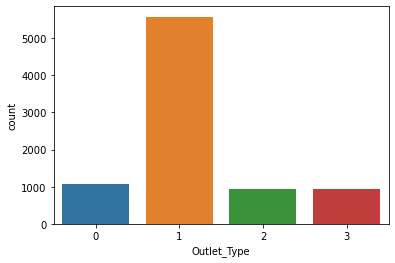

In [53]:
sns.countplot(modified_data['Outlet_Type'])


# Encode the Item_Fat_Content

(array([0, 1, 2]),
 [Text(0, 0, 'Low Fat'), Text(1, 0, 'Regular'), Text(2, 0, 'Non-Edible')])

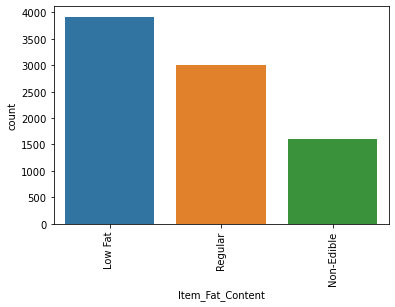

In [54]:

sns.countplot(modified_data['Item_Fat_Content'])
plt.xticks(rotation=90)


In [56]:
modified_data['Item_Fat_Content'] = modified_data['Item_Fat_Content'].astype(str)
encoder.fit(modified_data['Item_Fat_Content'])
modified_data['Item_Fat_Content'] = encoder.fit_transform(modified_data['Item_Fat_Content'])

In [57]:
#modified_data['Item_Fat_Content'] = encoder.transform(modified_data['Item_Fat_Content'])

#modified_data['Item_Fat_Content']  = encoder.fit_transform(modified_data['Item_Fat_Content'])

#encoder.fit(sorted_data['Item_Fat_Content'])

# Transform the 'Outlet_Type' column
sorted_data['Item_Fat_Content'] = encoder.transform(sorted_data['Item_Fat_Content'])

# Transform the 'Outlet_Type' column
#modified_data['Item_Fat_Content'] = encoder.transform(modified_data['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

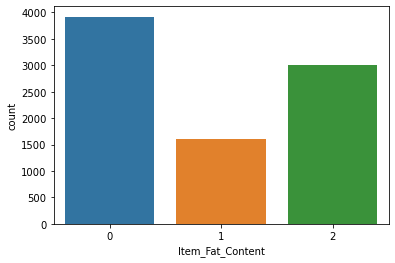

In [58]:
sns.countplot(modified_data['Item_Fat_Content'])

In [59]:
modified_data['Item_Fat_Content'].unique()


array([0, 2, 1])

In [60]:
modified_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Food,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,0.283587
1,DRC01,5.920,2,0.019278,Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,0.031419
2,FDN15,17.500,0,0.016760,Food,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,0.158115
3,FDX07,19.200,2,0.015274,Food,182.0950,OUT010,1998,3,Tier 3,Grocery Store,0.053555
4,NCD19,8.930,1,0.008082,Non-Consumable,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Food,214.5218,OUT013,1987,0,Tier 3,Supermarket Type1,0.210293
8519,FDS36,8.380,2,0.046982,Food,108.1570,OUT045,2002,3,Tier 2,Supermarket Type1,0.039529
8520,NCJ29,10.600,1,0.035186,Non-Consumable,85.1224,OUT035,2004,2,Tier 2,Supermarket Type1,0.088850
8521,FDN46,7.210,2,0.145221,Food,103.1332,OUT018,2009,1,Tier 3,Supermarket Type2,0.138835


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

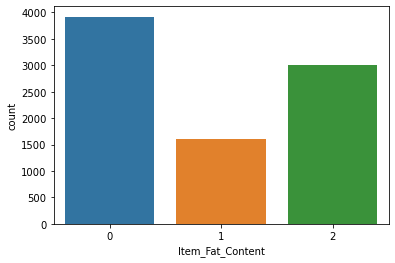

In [61]:
sns.countplot(sorted_data['Item_Fat_Content'])

# Encode the item_type

In [62]:
encoder.fit(sorted_data['Item_Type'])

# Transform the 'Outlet_Type' column
sorted_data['Item_Type'] = encoder.transform(sorted_data['Item_Type'])

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

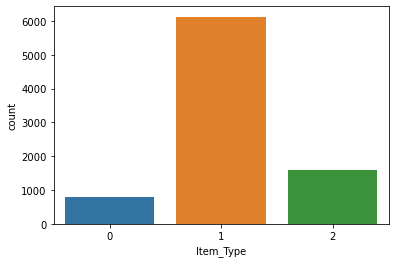

In [63]:
sns.countplot(sorted_data['Item_Type'])
plt.xticks(rotation=0)

In [64]:
modified_data['Item_Fat_Content'] = modified_data['Item_Fat_Content'].astype(str)
encoder.fit(modified_data['Item_Fat_Content'])
modified_data['Item_Fat_Content'] = encoder.fit_transform(modified_data['Item_Fat_Content'])


In [131]:
# Transform the 'Outlet_Type' column
#modified_data['Item_Type'] = encoder.transform(modified_data['Item_Type'])

In [65]:
modified_data['Item_Type']= encoder.fit_transform(modified_data['Item_Type'])

In [66]:
modified_data['Item_Type'].unique()


array([1, 0, 2])

# Data outlet location type

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 2'), Text(2, 0, 'Tier 3')])

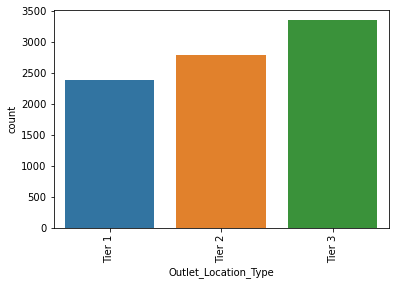

In [68]:
sortLoc = modified_data.sort_values(by='Outlet_Location_Type')
sns.countplot(sortLoc['Outlet_Location_Type'])
plt.xticks(rotation=90)


In [72]:


# Encode labels in column 'species'.
sortLoc['Outlet_Location_Type']= encoder.fit_transform(sortLoc['Outlet_Location_Type'])





<AxesSubplot:>

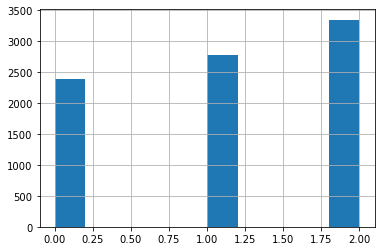

In [75]:
modified_data['Outlet_Location_Type'].hist()

In [76]:
modified_data['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [86]:
modified_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,1,249.8092,OUT049,1999,1,0,1,0.283587
1,DRC01,5.92,2,0.019278,0,48.2692,OUT018,2009,1,2,2,0.031419
2,FDN15,17.50,0,0.016760,1,141.6180,OUT049,1999,1,0,1,0.158115
3,FDX07,19.20,2,0.015274,1,182.0950,OUT010,1998,1,2,0,0.053555
4,NCD19,8.93,1,0.008082,2,53.8614,OUT013,1987,0,2,1,0.073651


# Save the modifed data into csv file

In [87]:
modified_data.to_csv('data/modified_data.csv', index=False)
